In [5]:
user = "Alex"
pathtorepo = "C:\\Users\\" * user * "\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include("C:\\Users\\" * user * "\\Desktop\\dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

jacob_TM_ (generic function with 1 method)

In [6]:
using StaticArrays, DifferentialEquations, DynamicalSystems, Statistics
#x1, y1, z1, x2, y2, z2, z  = -30..30, -30..30,  -30..30, -30..30, -30..30, -30..30, -30..30
#box = x1 × y1 × z1 × x2 × y2 × z2 × z
using CairoMakie

In [7]:
function HR_mem(u, p, t)
    function sigma(x)
        return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
    end
    memristor(z, k1_me, k2_me) = k1_me + k2_me * z^2

    a, b, c, d, s, xr, r,  I, vs, k1, k2, k1_me, k2_me  = p
    x1, y1, z1, x2, y2, z2, z = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + memristor(z, k1_me, k2_me)*(x2 - x1)
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + memristor(z, k1_me, k2_me)*(x1 - x2)
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )

    du7 = x1 - x2
    
    return SVector(du1, du2, du3, du4, du5, du6, du7)
end

HR_mem (generic function with 1 method)

In [8]:
"""
С двух ночи

k1= 0.07; k2 = 0.07;
k1_me = 0.35
k2_me = 0.0
"""

"С двух ночи\n\nk1= 0.07; k2 = 0.07;\nk1_me = 0.35\nk2_me = 0.0\n"

In [189]:
a = 1.0; b = 3.0; c = 1.0; d = 5.0;
xr = -1.6; r = 0.01; s = 5.0; I = 4.0; xv = 2.0;
k1= 0.07; k2 = 0.07;
k1_me = 0.411371237458194
k2_me = 0.2
u0 = [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0, 0.0]
p = [a, b, c, d, s, xr, r, I, xv, k1, k2, k1_me, k2_me];

In [181]:
tt = 3000; time = 10000; tstep = 0.001
integ_set = (alg = RK4(), adaptive = false, dt = tstep)

(alg = RK4(stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false)), adaptive = false, dt = 0.001)

In [111]:
another = [-0.5191345591508597
-0.20806201734476223
 4.708031581180823
-0.5191345591508597
-0.20806201734476223
 4.708031581180823
 1.7613505759545642];

In [213]:
ds = CoupledODEs(HR_mem, tr[end], p, diffeq = integ_set)
tr, trange = trajectory(ds, time; Δt = integ_set.dt, Ttr = tt)
xsum = tr[:, 1] + tr[:, 4];

In [214]:
ds = CoupledODEs(HR_mem, tr[end], p, diffeq = integ_set)
LSE = lyapunovspectrum(ds, time)
LSE = sort(LSE)

7-element Vector{Float64}:
 -9.444476741759846
 -8.591808895738549
 -0.004539961919349057
 -0.00043820339665452435
 -0.00023932300072322684
  0.00032329797664618364
  0.010094939131713523

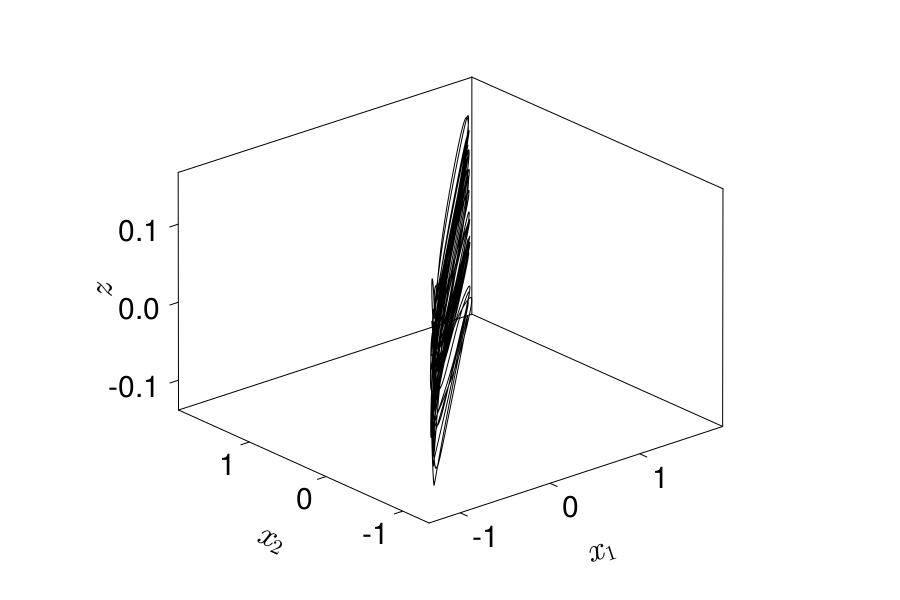

CairoMakie.Screen{IMAGE}


In [215]:
ts, tf = 2000000, 3000000
idx, idy, idz = 1, 4, 7
lb_size = 35; tck_size = 30;
dis  = 60;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1],
            xlabel = L"x_1", ylabel = L"x_2", zlabel = L"z",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis)

lines!(tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz], linewidth = 1.0, color = :black)
display(f)

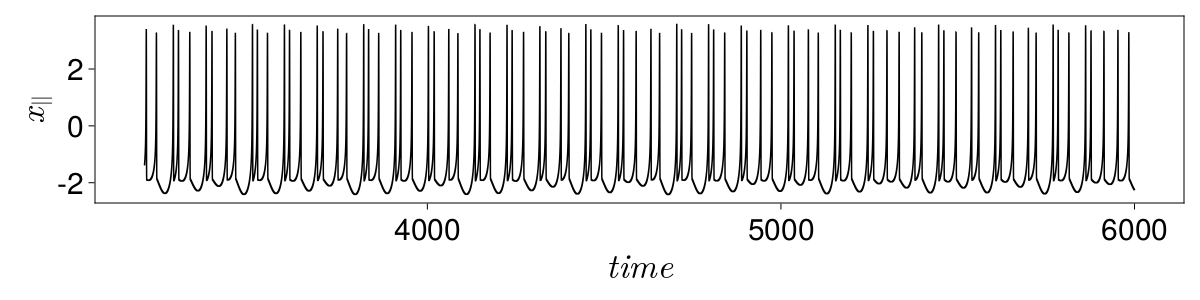

CairoMakie.Screen{IMAGE}


In [217]:
ts, tf = 200000, 3000000

CairoMakie.activate!()
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$x_{||}$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)

lines!(axis, trange[ts:tf], xsum[ts:tf], linewidth = 1.5, color = :black)
display(f)